# Classification playground

Put your imports here.

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime as dt

from dataset_util import uci_mhealth
from dataset_util.extract_input_features import all_feature, extract_features
import matplotlib.pyplot as plt

from config import SQLITE_DATABASE_FILE
from evaluate_classification import evaluation_metrics
from scikitplot.metrics import plot_confusion_matrix, plot_roc

Load dataset from sqlite database.

Make sure you have downloaded the raw datasets and loaded them into the database by running:
```
python rawdataset.py
python load_dataset.py
```

In [2]:
with sqlite3.connect(SQLITE_DATABASE_FILE) as conn:
    # features = pd.read_sql_query(uci_mhealth.raw_table_valid_data_query, conn)
    global sliding_windows, subject_ids, activity_ids
    sliding_windows = uci_mhealth.to_sliding_windows(conn)
    subject_ids = uci_mhealth.get_subject_ids(conn)
    activity_ids = uci_mhealth.get_activity_ids(conn)
    activity_ids.sort()

Now we can play with it.

features extracted
training set and test set ready
training set: (2380, 322)
test set: (1047, 322)

classifier result
--------------------------------------------------
activity  1.0
sensitivity:	 99.89539748953975
specificity:	 100.0
auc:	 1.0
--------------------------------------------------
activity  2.0
sensitivity:	 100.0
specificity:	 98.91304347826087
auc:	 1.0
--------------------------------------------------
activity  3.0
sensitivity:	 100.0
specificity:	 100.0
auc:	 1.0
--------------------------------------------------
activity  4.0
sensitivity:	 99.68553459119497
specificity:	 100.0
auc:	 1.0
--------------------------------------------------
activity  5.0
sensitivity:	 100.0
specificity:	 96.73913043478261
auc:	 1.0
--------------------------------------------------
activity  6.0
sensitivity:	 99.89528795811518
specificity:	 100.0
auc:	 0.999908946050535
--------------------------------------------------
activity  7.0
sensitivity:	 100.0
specificity:	 98.94736842105263
a

/usr/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


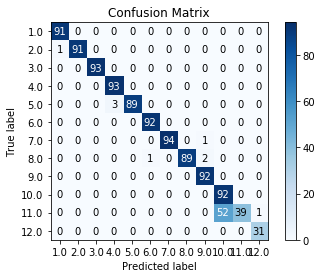

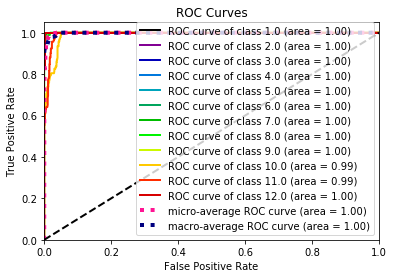

In [3]:
TRAINING_SET_PROPORTION = 0.7

features = extract_features(sliding_windows, all_feature)
print("features extracted")

X, y = uci_mhealth.to_classification(features)

# n_subs = len(subject_ids)
# n_training = round(n_subs * TRAINING_SET_PROPORTION)
# # n_test = n_subs - n_training
# idx = np.isin(features.loc[:,"subject_id"], subject_ids[:n_training])
# training_set = features[idx]
# test_set = features[np.logical_not(idx)]
# train_X, train_y = uci_mhealth.to_classification(training_set)
# test_X, test_y = uci_mhealth.to_classification(test_set)
# print("training set and test set ready")
# print("training set:", np.shape(train_X))
# print("test set:", np.shape(test_X))

clsf = RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1)
# clsf.fit(train_X,train_y)
# RF_pred = clsf.predict(test_X)
# pred_probability = clsf.predict_proba(test_X)

# evaluation_metrics(test_y,RF_pred, pred_probability)

# plot_confusion_matrix(test_y, RF_pred)
# plot_roc(test_y, pred_probability)

In [6]:
# fts = zip(train_X.columns.values, clsf.feature_importances_)
# assert(len(train_X.columns.values) == len(clsf.feature_importances_))
# # list(train_X.columns.values).index('subject_id_mean')
# ft_list = list(fts)
# ft_list.sort(key = lambda x: x[1], reverse=True)
# print(np.array(ft_list))

from sklearn.feature_selection import RFE
selector = RFE(clsf, 10, step=1)
selector = selector.fit(X, y)


In [7]:
print(selector.support_)
print(selector.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [14]:
features.columns[2:][selector.support_]

Index(['chest_acc_x_quantile_1', 'left_ankle_acc_y_quantile_2',
       'chest_acc_x_quantile_5', 'left_ankle_magn_x_quantile_5',
       'left_ankle_acc_y_fft_quantile_5', 'left_ankle_magn_x_fft_quantile_5',
       'right_lower_arm_acc_y_fft_quantile_5', 'left_ankle_magn_x_fft_max',
       'right_lower_arm_acc_y_fft_max', 'right_lower_arm_magn_z_fft_max'],
      dtype='object')


classifier result
--------------------------------------------------
activity  1.0
sensitivity:	 99.89539748953975
specificity:	 100.0
auc:	 1.0
--------------------------------------------------
activity  2.0
sensitivity:	 100.0
specificity:	 98.91304347826087
auc:	 0.9999544730252674
--------------------------------------------------
activity  3.0
sensitivity:	 100.0
specificity:	 100.0
auc:	 1.0
--------------------------------------------------
activity  4.0
sensitivity:	 99.68553459119497
specificity:	 100.0
auc:	 0.9999661865151822
--------------------------------------------------
activity  5.0
sensitivity:	 100.0
specificity:	 95.65217391304348
auc:	 0.9999999999999999
--------------------------------------------------
activity  6.0
sensitivity:	 99.89528795811518
specificity:	 100.0
auc:	 0.9999089460505349
--------------------------------------------------
activity  7.0
sensitivity:	 100.0
specificity:	 98.94736842105263
auc:	 0.999955771782397
------------------------------

/usr/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "



classifier result
--------------------------------------------------
activity  1.0
sensitivity:	 99.89539748953975
specificity:	 100.0
auc:	 0.9996551565589222
--------------------------------------------------
activity  2.0
sensitivity:	 100.0
specificity:	 98.91304347826087
auc:	 0.9991918961984976
--------------------------------------------------
activity  3.0
sensitivity:	 100.0
specificity:	 98.9247311827957
auc:	 1.0
--------------------------------------------------
activity  4.0
sensitivity:	 99.68553459119497
specificity:	 100.0
auc:	 0.9998760172223349
--------------------------------------------------
activity  5.0
sensitivity:	 99.89528795811518
specificity:	 95.65217391304348
auc:	 0.9993455497382199
--------------------------------------------------
activity  6.0
sensitivity:	 99.3717277486911
specificity:	 100.0
auc:	 0.9996642385613476
--------------------------------------------------
activity  7.0
sensitivity:	 100.0
specificity:	 98.94736842105263
auc:	 0.999535603

/usr/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


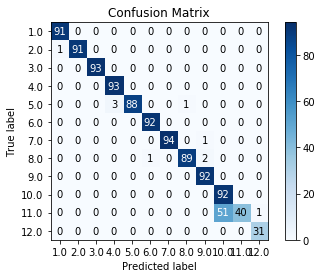

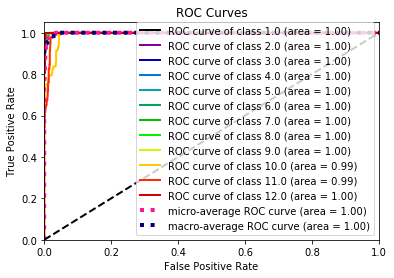

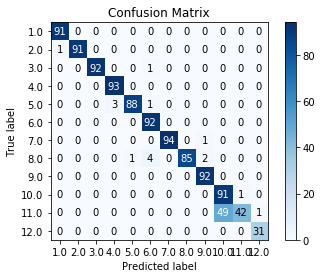

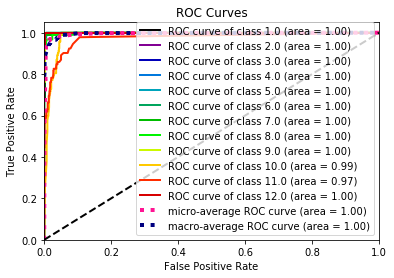

In [21]:
n_subs = len(subject_ids)
n_training = round(n_subs * TRAINING_SET_PROPORTION)
# n_test = n_subs - n_training
idx = np.isin(features.loc[:,"subject_id"], subject_ids[:n_training])
training_set = features[idx]
test_set = features[np.logical_not(idx)]
train_X, train_y = uci_mhealth.to_classification(training_set)
train_X_2 = train_X.iloc[:,selector.support_]
test_X, test_y = uci_mhealth.to_classification(test_set)
test_X_2 = test_X.iloc[:,selector.support_]

clsf_1 = RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1)
clsf_1.fit(train_X,train_y)
RF_pred = clsf_1.predict(test_X)
pred_probability = clsf_1.predict_proba(test_X)

evaluation_metrics(test_y,RF_pred, pred_probability)

plot_confusion_matrix(test_y, RF_pred)
plot_roc(test_y, pred_probability)


clsf_2 = RandomForestClassifier(n_estimators=500, class_weight="balanced", n_jobs=-1)
clsf_2.fit(train_X_2,train_y)
RF_pred = clsf_2.predict(test_X_2)
pred_probability = clsf_2.predict_proba(test_X_2)

evaluation_metrics(test_y,RF_pred, pred_probability)

plot_confusion_matrix(test_y, RF_pred)
plot_roc(test_y, pred_probability)